In [1]:
import pandas as pd
import joblib
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and model
df = pd.read_csv("../data/student_preprocessed.csv")
best_model = joblib.load("../results/best_student_model.pkl")

# Split features and target
X = df.drop("G3", axis=1)
y = df["G3"]

# Train-test split (same random_state as before)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


R² Score: 0.818
MAE: 1.172
RMSE: 1.934


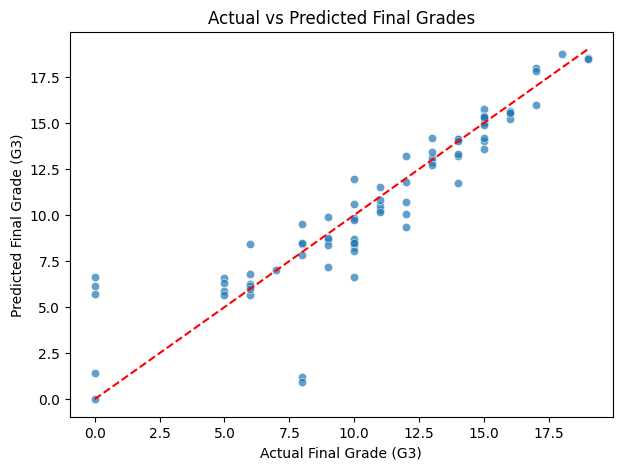

In [2]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Actual vs Predicted Final Grades")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


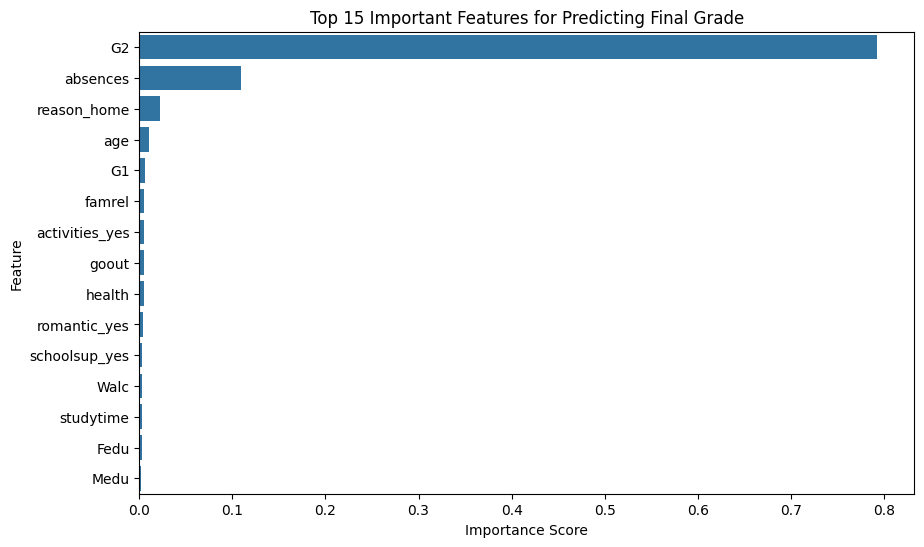

In [4]:
# Get feature importance from the model
importances = best_model.feature_importances_
features = X.columns

# Sort them
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Important Features for Predicting Final Grade")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
